<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/ModelTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Feature Based

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/Model_1_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df.columns = ["vSegID","vSegDir","latitude","longitude","cluster"]

In [ ]:
df

,vSegID,vSegDir,latitude,longitude,cluster
0,100,0,41.032530,28.936566,2
1,100,1,41.025294,28.929550,2
2,101,0,41.025396,28.929454,2
3,101,1,41.018156,28.922682,0
4,1026,1,40.990926,28.679818,0
...,...,...,...,...,...
1461,99,0,41.040595,28.940399,2
1462,99,1,41.032445,28.936590,2
1463,9,0,40.954825,29.083659,2
1464,2083,0,40.998055,28.933086,0


In [ ]:
df.cluster.max()

4

In [ ]:
path = "drive/MyDrive/2017_concat/Concat_2017.csv"
df2 = pd.read_csv(path)

In [ ]:
df2

,time,drive/MyDrive/2017_v1/739_1_2017.csv,drive/MyDrive/2017_v1/482_1_2017.csv,drive/MyDrive/2017_v1/1920_1_2017.csv,drive/MyDrive/2017_v1/715_0_2017.csv,drive/MyDrive/2017_v1/1778_0_2017.csv,drive/MyDrive/2017_v1/722_1_2017.csv,drive/MyDrive/2017_v1/306_1_2017.csv,drive/MyDrive/2017_v1/1832_1_2017.csv,drive/MyDrive/2017_v1/1923_1_2017.csv,drive/MyDrive/2017_v1/603_1_2017.csv,drive/MyDrive/2017_v1/1868_1_2017.csv,drive/MyDrive/2017_v1/588_1_2017.csv,drive/MyDrive/2017_v1/485_1_2017.csv,drive/MyDrive/2017_v1/743_1_2017.csv,drive/MyDrive/2017_v1/380_1_2017.csv,drive/MyDrive/2017_v1/420_1_2017.csv,drive/MyDrive/2017_v1/1431_0_2017.csv,drive/MyDrive/2017_v1/931_0_2017.csv,drive/MyDrive/2017_v1/256_0_2017.csv,drive/MyDrive/2017_v1/1730_1_2017.csv,drive/MyDrive/2017_v1/452_0_2017.csv,drive/MyDrive/2017_v1/721_0_2017.csv,drive/MyDrive/2017_v1/1967_1_2017.csv,drive/MyDrive/2017_v1/187_1_2017.csv,drive/MyDrive/2017_v1/1746_0_2017.csv,drive/MyDrive/2017_v1/30_0_2017.csv,drive/MyDrive/2017_v1/70_1_2017.csv,drive/MyDrive/2017_v1/102_0_2017.csv,drive/MyDrive/2017_v1/601_0_2017.csv,drive/MyDrive/2017_v1/337_0_2017.csv,drive/MyDrive/2017_v1/694_0_2017.csv,drive/MyDrive/2017_v1/181_0_2017.csv,drive/MyDrive/2017_v1/641_0_2017.csv,drive/MyDrive/2017_v1/644_1_2017.csv,drive/MyDrive/2017_v1/203_0_2017.csv,drive/MyDrive/2017_v1/509_0_2017.csv,drive/MyDrive/2017_v1/326_0_2017.csv,drive/MyDrive/2017_v1/497_0_2017.csv,drive/MyDrive/2017_v1/880_0_2017.csv,...,drive/MyDrive/2017_v1/726_1_2017.csv,drive/MyDrive/2017_v1/251_1_2017.csv,drive/MyDrive/2017_v1/83_0_2017.csv,drive/MyDrive/2017_v1/514_0_2017.csv,drive/MyDrive/2017_v1/1836_0_2017.csv,drive/MyDrive/2017_v1/504_1_2017.csv,drive/MyDrive/2017_v1/1438_1_2017.csv,drive/MyDrive/2017_v1/599_0_2017.csv,drive/MyDrive/2017_v1/1858_1_2017.csv,drive/MyDrive/2017_v1/638_1_2017.csv,drive/MyDrive/2017_v1/21_0_2017.csv,drive/MyDrive/2017_v1/480_1_2017.csv,drive/MyDrive/2017_v1/891_1_2017.csv,drive/MyDrive/2017_v1/399_1_2017.csv,drive/MyDrive/2017_v1/589_0_2017.csv,drive/MyDrive/2017_v1/1831_1_2017.csv,drive/MyDrive/2017_v1/750_0_2017.csv,drive/MyDrive/2017_v1/1440_1_2017.csv,drive/MyDrive/2017_v1/884_1_2017.csv,drive/MyDrive/2017_v1/387_1_2017.csv,drive/MyDrive/2017_v1/613_0_2017.csv,drive/MyDrive/2017_v1/529_0_2017.csv,drive/MyDrive/2017_v1/17_1_2017.csv,drive/MyDrive/2017_v1/453_1_2017.csv,drive/MyDrive/2017_v1/392_1_2017.csv,drive/MyDrive/2017_v1/740_0_2017.csv,drive/MyDrive/2017_v1/706_1_2017.csv,drive/MyDrive/2017_v1/881_1_2017.csv,drive/MyDrive/2017_v1/308_0_2017.csv,drive/MyDrive/2017_v1/279_0_2017.csv,drive/MyDrive/2017_v1/1837_0_2017.csv,drive/MyDrive/2017_v1/1853_0_2017.csv,drive/MyDrive/2017_v1/202_0_2017.csv,drive/MyDrive/2017_v1/1891_0_2017.csv,drive/MyDrive/2017_v1/619_1_2017.csv,drive/MyDrive/2017_v1/189_0_2017.csv,drive/MyDrive/2017_v1/1751_0_2017.csv,drive/MyDrive/2017_v1/641_1_2017.csv,drive/MyDrive/2017_v1/542_1_2017.csv,drive/MyDrive/2017_v1/714_1_2017.csv
0,2017-01-01 00:00:00,77.000000,92.000000,10.0,110.500000,60.500000,105.000000,63.0,90.0,10.0,78.500000,75.500000,57.50000,91.000000,41.0,86.500000,75.500000,85.0,90.0,76.000000,57.0,87.000000,112.50000,10.0,88.500000,72.000000,94.000000,74.000000,75.000000,67.000000,95.500000,10.0,10.0,104.000000,108.000000,76.000000,45.0,85.500000,84.500000,53.000000,...,99.0,90.0,44.500000,45.0,90.0,69.0,85.0,10.0,90.0,101.000000,86.00000,105.000000,10.0,65.00000,60.000000,90.0,31.00000,85.0,10.0,84.500000,72.00000,49.50000,97.50000,101.0,87.000000,88.000000,102.500000,74.0,79.50000,70.000000,90.0,10.0,75.000000,87.000000,93.50000,89.500000,45.0,103.0,29.000000,112.000000
1,2017-01-01 00:05:00,57.000000,88.000000,10.0,115.000000,65.000000,107.000000,63.0,90.0,10.0,75.000000,84.000000,59.00000,87.000000,41.0,91.000000,68.000000,85.0,90.0,75.000000,57.0,91.000000,111.00000,10.0,82.000000,64.000000,98.000000,70.000000,77.000000,71.000000,99.000000,10.0,10.0,95.000000,109.000000,75.000000,45.0,88.000000,85.000000,61.000000,...,99.0,90.0,54.000000,45.0,90.0

In [ ]:
import calendar
import os
import matplotlib.pyplot as plt

path = "drive/MyDrive/2017_v1"
files = list()
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))


In [ ]:
def show_plotline_5minutes(seg_id,seg_dir,month,day):
  """ month: int 1 -> January
                 12 -> December
      day: int 0 -> Monday
               6 -> Sunday
  """
  filename = "drive/MyDrive/2017_v1/{}_{}_2017.csv".format(seg_id,seg_dir)
  df = pd.read_csv(filename)
  size = (24 * 60) // 5
  plt.figure(figsize=(24,20))
  graph = pd.DataFrame(columns=["i","day","month","year"])
  index = 1

  for i in range(0,len(df),size):
    date = df.iloc[i]["time"]
    year = int(date[:4])
    month_ = int(date[5:7])
    day_ = int(date[8:10])
    

    if month == month_ and day == calendar.weekday(year,month_,day_):
      index += 1
      graph.loc[date] = [i,day_,month_,year]
      

  for j in range(1,index):
    plt.subplot(3,2,j,title="Traffic Flow Speed in 5 Minutes",
                  xlabel="{}/{}/{}".format(graph.iloc[j-1]["day"],graph.iloc[j-1]["month"],graph.iloc[j-1]["year"]),
                  ylabel="Speed (km/h)")
    plt.plot(df[graph.iloc[j-1]["i"]:graph.iloc[j-1]["i"]+size]["time"],
               df[graph.iloc[j-1]["i"]:graph.iloc[j-1]["i"]+size]["speed"])


Automated Tests

In [ ]:
def calc_error_rate(seg_ids,seg_dirs,dates):
  date1 = dates[0]
  date2 = dates[1]
  date3 = dates[2]
  date4 = dates[3]
  date5 = dates[4]
  speed = 0
  speed_reals = list()

  for i in range(len(seg_ids)):
    col_name = "drive/MyDrive/2017_v1/{}_{}_2017.csv".format(seg_ids[i],seg_dirs[i])
    speed += df2[df2["time"] == date1][col_name].iloc[0]
    speed += df2[df2["time"] == date2][col_name].iloc[0]
    speed += df2[df2["time"] == date3][col_name].iloc[0]
    speed += df2[df2["time"] == date4][col_name].iloc[0]
    speed_reals.append(df2[df2["time"] == date5][col_name].iloc[0])

  speed_predict = speed / (4 * len(seg_ids))
  err_rate = 0

  for i in range(len(seg_ids)):
    err_rate += abs(speed_reals[i] - speed_predict) / speed_reals[i]

  return err_rate / len(seg_ids)


In [ ]:
dates_test1 = ["2017-03-01 12:00:00", "2017-03-08 12:00:00", "2017-03-15 12:00:00", "2017-03-22 12:00:00", "2017-03-29 12:00:00"]
dates_test2 = ["2017-10-01 12:00:00", "2017-10-08 12:00:00", "2017-10-15 12:00:00", "2017-10-22 12:00:00", "2017-10-29 12:00:00"]
dates_test3 = ["2017-07-01 12:00:00", "2017-07-08 12:00:00", "2017-07-15 12:00:00", "2017-07-22 12:00:00", "2017-07-29 12:00:00"]

In [ ]:
clus0_seg_ids, clus0_seg_dirs = [507,506,508,505,504], [0,0,0,0,0]
clus1_seg_ids, clus1_seg_dirs = [1432,1432,1433,1434,1431], [0,1,0,1,0]
clus2_seg_ids, clus2_seg_dirs = [93,94,94,93,95], [0,0,1,1,0]
clus3_seg_ids, clus3_seg_dirs = [480,480,481,482,482], [0,1,0,0,1]
clus4_seg_ids, clus4_seg_dirs = [696,695,697,694,693], [0,0,0,0,0]

In [ ]:
test1_model_error = calc_error_rate(clus0_seg_ids, clus0_seg_dirs, dates_test1) + calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1) + \
                    calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1) + calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1) +\
                    calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1)

test1_model_error /= 5

In [ ]:
print("Test 1 Results")
print("Cluster 0 mean absolute error rate: ",calc_error_rate(clus0_seg_ids, clus0_seg_dirs, dates_test1))
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1))
print("Model mean absolute error rate: ",test1_model_error)

Test 1 Results
Cluster 0 mean absolute error rate:  0.25955388479517516
Cluster 1 mean absolute error rate:  0.22058823529411767
Cluster 2 mean absolute error rate:  0.21196924177738902
Cluster 3 mean absolute error rate:  0.29337784712985426
Cluster 4 mean absolute error rate:  0.26199033611862055
Model mean absolute error rate:  0.24949590902303137


In [ ]:
test2_model_error = calc_error_rate(clus0_seg_ids, clus0_seg_dirs, dates_test2) + calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2) + \
                    calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2) + calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2) +\
                    calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2)

test2_model_error /= 5

In [ ]:
print("Test 2 Results")
print("Cluster 0 mean absolute error rate: ",calc_error_rate(clus0_seg_ids, clus0_seg_dirs, dates_test2))
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2))
print("Model mean absolute error rate: ",test2_model_error)

Test 2 Results
Cluster 0 mean absolute error rate:  0.025811525572292122
Cluster 1 mean absolute error rate:  0.4216275310287432
Cluster 2 mean absolute error rate:  0.12665945957153088
Cluster 3 mean absolute error rate:  0.04021969758853513
Cluster 4 mean absolute error rate:  0.14771403891371876
Model mean absolute error rate:  0.152406450534964


In [ ]:
test3_model_error = calc_error_rate(clus0_seg_ids, clus0_seg_dirs, dates_test3) + calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3) + \
                    calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3) + calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3) +\
                    calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3)

test3_model_error /= 5

In [ ]:
print("Test 3 Results")
print("Cluster 0 mean absolute error rate: ",calc_error_rate(clus0_seg_ids, clus0_seg_dirs, dates_test3))
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3))
print("Model mean absolute error rate: ",test3_model_error)

Test 3 Results
Cluster 0 mean absolute error rate:  0.023998429909893287
Cluster 1 mean absolute error rate:  0.018300653594771243
Cluster 2 mean absolute error rate:  0.3142168849555017
Cluster 3 mean absolute error rate:  0.039950027291266316
Cluster 4 mean absolute error rate:  0.06513636334546329
Model mean absolute error rate:  0.09232047181937918


In [ ]:
model_error = (test1_model_error + test2_model_error + test3_model_error) / 3
print("Model mean absoulete error rate: ",model_error)

Model mean absoulete error rate:  0.16474094379245818


In [ ]:
clus0_all_seg_dirs = list()
clus0_all_seg_ids = list()
clus1_all_seg_dirs = list()
clus1_all_seg_ids = list()
clus2_all_seg_dirs = list()
clus2_all_seg_ids = list()
clus3_all_seg_dirs = list()
clus3_all_seg_ids = list()
clus4_all_seg_dirs = list()
clus4_all_seg_ids = list()

In [ ]:
for i in range(df.shape[0]):
  seg_id = int(df.iloc[i][0])
  seg_dir = int(df.iloc[i][1])
  cluster = int(df.iloc[i][4])

  if cluster == 0:
    clus0_all_seg_dirs.append(seg_dir)
    clus0_all_seg_ids.append(seg_id)

  elif cluster == 1:
    clus1_all_seg_dirs.append(seg_dir)
    clus1_all_seg_ids.append(seg_id)

  elif cluster == 2:
    clus2_all_seg_dirs.append(seg_dir)
    clus2_all_seg_ids.append(seg_id)

  elif cluster == 3:
    clus3_all_seg_dirs.append(seg_dir)
    clus3_all_seg_ids.append(seg_id)

  elif cluster == 4:
    clus4_all_seg_dirs.append(seg_dir)
    clus4_all_seg_ids.append(seg_id)


In [ ]:
#cluster 0
seg_count = list()
error_rate = list()
for i in range(5,len(clus0_all_seg_ids),10):
  seg_count.append(i)
  error_rate.append(calc_error_rate(clus0_all_seg_ids[:i], clus0_all_seg_dirs[:i], dates_test1))

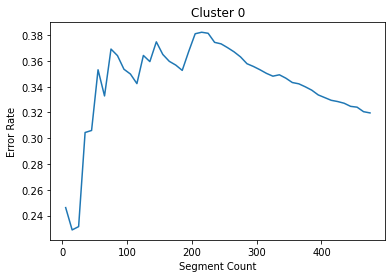

In [ ]:
plt.plot(seg_count, error_rate)
plt.xlabel("Segment Count")
plt.ylabel("Error Rate")
plt.title("Cluster 0")
plt.show()

In [ ]:
#cluster 1
seg_count = list()
error_rate = list()
for i in range(5,len(clus1_all_seg_ids),10):
  seg_count.append(i)
  error_rate.append(calc_error_rate(clus1_all_seg_ids[:i], clus1_all_seg_dirs[:i], dates_test1))

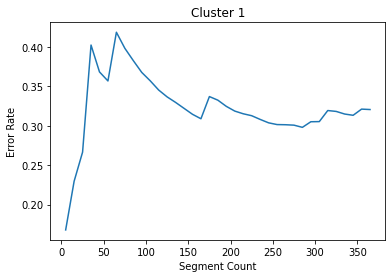

In [ ]:
plt.plot(seg_count, error_rate)
plt.xlabel("Segment Count")
plt.ylabel("Error Rate")
plt.title("Cluster 1")
plt.show()

In [ ]:
#cluster 2
seg_count = list()
error_rate = list()
for i in range(5,len(clus2_all_seg_ids),10):
  seg_count.append(i)
  error_rate.append(calc_error_rate(clus2_all_seg_ids[:i], clus2_all_seg_dirs[:i], dates_test1))

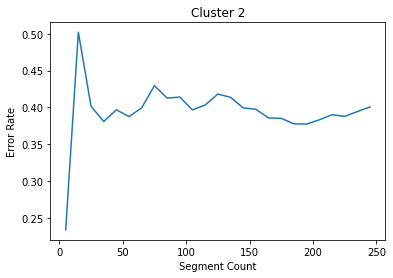

In [ ]:
plt.plot(seg_count, error_rate)
plt.xlabel("Segment Count")
plt.ylabel("Error Rate")
plt.title("Cluster 2")
plt.show()

In [ ]:
#cluster 3
seg_count = list()
error_rate = list()
for i in range(5,len(clus3_all_seg_ids),10):
  seg_count.append(i)
  error_rate.append(calc_error_rate(clus3_all_seg_ids[:i], clus3_all_seg_dirs[:i], dates_test1))

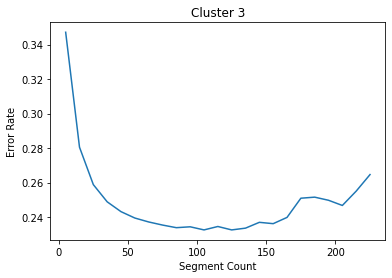

In [ ]:
plt.plot(seg_count, error_rate)
plt.xlabel("Segment Count")
plt.ylabel("Error Rate")
plt.title("Cluster 3")
plt.show()

In [ ]:
#cluster 4
seg_count = list()
error_rate = list()
for i in range(5,len(clus4_all_seg_ids),10):
  seg_count.append(i)
  error_rate.append(calc_error_rate(clus4_all_seg_ids[:i], clus4_all_seg_dirs[:i], dates_test1))

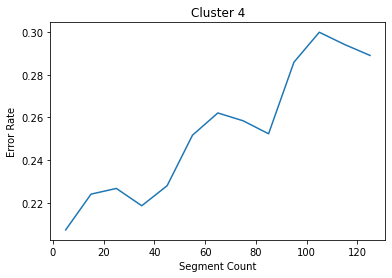

In [ ]:
plt.plot(seg_count, error_rate)
plt.xlabel("Segment Count")
plt.ylabel("Error Rate")
plt.title("Cluster 4")
plt.show()

Dissimilarity Based - Fall

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/FallWeightedClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df.columns = ["vSegID","vSegDir","latitude","longitude","cluster"]

In [ ]:
dates_test1 = ["2017-09-01 19:00:00", "2017-09-08 19:00:00", "2017-09-15 19:00:00", "2017-09-22 19:00:00", "2017-09-29 19:00:00"]
dates_test2 = ["2017-10-01 19:00:00", "2017-10-08 19:00:00", "2017-10-15 19:00:00", "2017-10-22 19:00:00", "2017-10-29 19:00:00"]
dates_test3 = ["2017-11-01 19:00:00", "2017-11-08 19:00:00", "2017-11-15 19:00:00", "2017-11-22 19:00:00", "2017-11-29 19:00:00"]

In [ ]:
clus1_seg_ids, clus1_seg_dirs = [264,265,266,263,264], [0,0,0,0,1]
clus2_seg_ids, clus2_seg_dirs = [1430,1431,1432,1429,1428], [1,1,1,1,1]
clus3_seg_ids, clus3_seg_dirs = [195,195,196,196,197], [0,1,0,1,1]
clus4_seg_ids, clus4_seg_dirs = [320,320,321,321,319], [1,0,1,0,1]
clus5_seg_ids, clus5_seg_dirs = [716,716,717,717,715], [1,0,1,0,1]
clus6_seg_ids, clus6_seg_dirs = [375,376,377,374,373], [0,0,0,0,0]
clus7_seg_ids, clus7_seg_dirs = [882,883,884,881,880], [0,0,0,0,0]
clus8_seg_ids, clus8_seg_dirs = [219,292,293,58,59], [0,0,0,1,1]
clus9_seg_ids, clus9_seg_dirs = [101], [0]

In [ ]:
test1_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1) + \
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test1) + calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test1) + \
                    calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test1) + calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test1) + \
                    calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test1)
test1_model_error /= 9

In [ ]:
print("Test 1 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test1))
print("Cluster 6 mean absolute error rate: ",calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test1))
print("Cluster 7 mean absolute error rate: ",calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test1))
print("Cluster 8 mean absolute error rate: ",calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test1))
print("Cluster 9 mean absolute error rate: ",calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test1))
print("Model mean absolute error rate: ",test1_model_error)

Test 1 Results
Cluster 1 mean absolute error rate:  0.10598290598290598
Cluster 2 mean absolute error rate:  0.18974612394766646
Cluster 3 mean absolute error rate:  0.22934423083225308
Cluster 4 mean absolute error rate:  0.6121028772175465
Cluster 5 mean absolute error rate:  0.050822328116901905
Cluster 6 mean absolute error rate:  0.20761190659158238
Cluster 7 mean absolute error rate:  0.6034381444215496
Cluster 8 mean absolute error rate:  0.46993942974231057
Cluster 9 mean absolute error rate:  0.001086956521739223
Model mean absolute error rate:  0.2744527670416062


In [ ]:
test2_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2) + \
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test2) + calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test2) + \
                    calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test2) + calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test2) + \
                    calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test2)
test2_model_error /= 9

In [ ]:
print("Test 2 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test2))
print("Cluster 6 mean absolute error rate: ",calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test2))
print("Cluster 7 mean absolute error rate: ",calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test2))
print("Cluster 8 mean absolute error rate: ",calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test2))
print("Cluster 9 mean absolute error rate: ",calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test2))
print("Model mean absolute error rate: ",test2_model_error)

Test 2 Results
Cluster 1 mean absolute error rate:  0.10598290598290598
Cluster 2 mean absolute error rate:  0.23263100694767802
Cluster 3 mean absolute error rate:  0.14793497919543572
Cluster 4 mean absolute error rate:  0.7299970869694101
Cluster 5 mean absolute error rate:  0.08350829820033312
Cluster 6 mean absolute error rate:  0.1133162545709275
Cluster 7 mean absolute error rate:  0.3757207094996935
Cluster 8 mean absolute error rate:  0.1990283428906825
Cluster 9 mean absolute error rate:  0.053853046594981996
Model mean absolute error rate:  0.2268858478724498


In [ ]:
test3_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3) + \
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test3) + calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test3) + \
                    calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test3) + calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test3) + \
                    calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test3)
test3_model_error /= 9

In [ ]:
print("Test 3 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test3))
print("Cluster 6 mean absolute error rate: ",calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test3))
print("Cluster 7 mean absolute error rate: ",calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test3))
print("Cluster 8 mean absolute error rate: ",calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test3))
print("Cluster 9 mean absolute error rate: ",calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test3))
print("Model mean absolute error rate: ",test3_model_error)

Test 3 Results
Cluster 1 mean absolute error rate:  0.10598290598290598
Cluster 2 mean absolute error rate:  0.11196430726880457
Cluster 3 mean absolute error rate:  0.153349053622703
Cluster 4 mean absolute error rate:  0.6586237801444924
Cluster 5 mean absolute error rate:  0.025007214691469576
Cluster 6 mean absolute error rate:  0.1419789653279881
Cluster 7 mean absolute error rate:  0.22245043643919082
Cluster 8 mean absolute error rate:  0.23527252733365386
Cluster 9 mean absolute error rate:  0.07568027210884358
Model mean absolute error rate:  0.19225660699111688


In [ ]:
model_error = (test1_model_error + test2_model_error + test3_model_error) / 3
print("Model mean absoulete error rate: ",model_error)

Model mean absoulete error rate:  0.23119840730172428


Dissimilarity Based - Winter

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/WinterCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df.columns = ["vSegID","vSegDir","latitude","longitude","cluster"]

In [ ]:
dates_test1 = ["2017-01-03 14:00:00", "2017-01-10 14:00:00", "2017-01-17 14:00:00", "2017-01-24 14:00:00", "2017-01-31 14:00:00"]
dates_test2 = ["2017-01-01 14:00:00", "2017-01-08 14:00:00", "2017-01-15 14:00:00", "2017-01-22 14:00:00", "2017-01-29 14:00:00"]
dates_test3 = ["2017-01-02 14:00:00", "2017-01-09 14:00:00", "2017-01-16 14:00:00", "2017-01-23 14:00:00", "2017-01-30 14:00:00"]

In [ ]:
clus1_seg_ids, clus1_seg_dirs = [266,266,267,267,268], [0,1,0,1,1]
clus2_seg_ids, clus2_seg_dirs = [1851,1851,1852,1852,1853], [0,1,0,1,0]
clus3_seg_ids, clus3_seg_dirs = [590,590,591,591,592], [0,1,0,1,1]
clus4_seg_ids, clus4_seg_dirs = [711,711,712,712,713], [1,0,1,0,1]
clus5_seg_ids, clus5_seg_dirs = [688,688,689,689,690], [1,0,1,0,1]
clus6_seg_ids, clus6_seg_dirs = [571,572,573], [0,0,0]
clus7_seg_ids, clus7_seg_dirs = [237,238,239], [1,1,1]
clus8_seg_ids, clus8_seg_dirs = [94,94,95,95,96], [0,1,0,1,1]
clus9_seg_ids, clus9_seg_dirs = [620,620,621,621,622], [0,1,0,1,1]
clus10_seg_ids, clus10_seg_dirs = [478,479,480,481,482], [1,1,1,1,1]
clus11_seg_ids, clus11_seg_dirs = [550,550,551,551], [1,0,1,0] 
clus12_seg_ids, clus12_seg_dirs = [634,634,635,635,636], [0,1,0,1,1] 
clus13_seg_ids, clus13_seg_dirs = [462,462,463,463,464], [1,0,1,0,1] 
clus14_seg_ids, clus14_seg_dirs = [84,84,85,85], [1,0,1,0] 
clus15_seg_ids, clus15_seg_dirs = [86,86,87,88,89], [0,1,1,0,0] 
clus16_seg_ids, clus16_seg_dirs = [108,108,110,110,112], [0,1,0,1,0]
clus17_seg_ids, clus17_seg_dirs = [390,390,391,391,392], [0,1,0,1,1]
clus18_seg_ids, clus18_seg_dirs = [4,5,6], [0,0,0]
clus19_seg_ids, clus19_seg_dirs = [1730,1730,1734,1734], [0,1,0,1]
clus20_seg_ids, clus20_seg_dirs = [1118], [0]
clus21_seg_ids, clus21_seg_dirs = [542,542,543,543,544], [0,1,0,1,1]
clus22_seg_ids, clus22_seg_dirs = [80,81,89], [1,1,1]
clus23_seg_ids, clus23_seg_dirs = [1829,1829,1830,1830], [0,1,0,1]
clus24_seg_ids, clus24_seg_dirs = [759], [1]

In [ ]:
test1_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1) + \
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test1) + calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test1) + \
                    calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test1) + calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test1) + \
                    calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test1) + calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test1) + \
                    calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test1) + calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test1) + \
                    calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test1) + calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test1) + \
                    calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test1) + calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test1) + \
                    calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test1) + calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test1) + \
                    calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test1) + calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test1) + \
                    calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test1) + calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test1) + \
                    calc_error_rate(clus23_seg_ids, clus23_seg_dirs, dates_test1) + calc_error_rate(clus24_seg_ids, clus24_seg_dirs, dates_test1) 
test1_model_error /= 24

In [ ]:
print("Test 1 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test1))
print("Cluster 6 mean absolute error rate: ",calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test1))
print("Cluster 7 mean absolute error rate: ",calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test1))
print("Cluster 8 mean absolute error rate: ",calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test1))
print("Cluster 9 mean absolute error rate: ",calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test1))
print("Cluster 10 mean absolute error rate: ",calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test1))
print("Cluster 11 mean absolute error rate: ",calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test1))
print("Cluster 12 mean absolute error rate: ",calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test1))
print("Cluster 13 mean absolute error rate: ",calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test1))
print("Cluster 14 mean absolute error rate: ",calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test1))
print("Cluster 15 mean absolute error rate: ",calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test1))
print("Cluster 16 mean absolute error rate: ",calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test1))
print("Cluster 17 mean absolute error rate: ",calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test1))
print("Cluster 18 mean absolute error rate: ",calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test1))
print("Cluster 19 mean absolute error rate: ",calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test1))
print("Cluster 20 mean absolute error rate: ",calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test1))
print("Cluster 21 mean absolute error rate: ",calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test1))
print("Cluster 22 mean absolute error rate: ",calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test1))
print("Cluster 23 mean absolute error rate: ",calc_error_rate(clus23_seg_ids, clus23_seg_dirs, dates_test1))
print("Cluster 24 mean absolute error rate: ",calc_error_rate(clus24_seg_ids, clus24_seg_dirs, dates_test1))
print("Model mean absolute error rate: ",test1_model_error)

Test 1 Results
Cluster 1 mean absolute error rate:  1.1452307692307693
Cluster 2 mean absolute error rate:  0.888888888888889
Cluster 3 mean absolute error rate:  0.21403553024528693
Cluster 4 mean absolute error rate:  0.05824986112970233
Cluster 5 mean absolute error rate:  0.05376802037085386
Cluster 6 mean absolute error rate:  0.16978261118555937
Cluster 7 mean absolute error rate:  0.06752561249892332
Cluster 8 mean absolute error rate:  0.2336259561060408
Cluster 9 mean absolute error rate:  0.6304061978630219
Cluster 10 mean absolute error rate:  0.07064231730742723
Cluster 11 mean absolute error rate:  0.7259088305814253
Cluster 12 mean absolute error rate:  0.08026812113958097
Cluster 13 mean absolute error rate:  0.4812792840506403
Cluster 14 mean absolute error rate:  0.15703455540577782
Cluster 15 mean absolute error rate:  0.20117297865533157
Cluster 16 mean absolute error rate:  0.9822307329837365
Cluster 17 mean absolute error rate:  0.075599163313863
Cluster 18 mean ab

In [ ]:
test2_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2) + \
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test2) + calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test2) + \
                    calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test2) + calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test2) + \
                    calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test2) + calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test2) + \
                    calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test2) + calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test2) + \
                    calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test2) + calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test2) + \
                    calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test2) + calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test2) + \
                    calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test2) + calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test2) + \
                    calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test2) + calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test2) + \
                    calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test2) + calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test2) + \
                    calc_error_rate(clus23_seg_ids, clus23_seg_dirs, dates_test2) + calc_error_rate(clus24_seg_ids, clus24_seg_dirs, dates_test2) 
test2_model_error /= 24

In [ ]:
print("Test 2 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test2))
print("Cluster 6 mean absolute error rate: ",calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test2))
print("Cluster 7 mean absolute error rate: ",calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test2))
print("Cluster 8 mean absolute error rate: ",calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test2))
print("Cluster 9 mean absolute error rate: ",calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test2))
print("Cluster 10 mean absolute error rate: ",calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test2))
print("Cluster 11 mean absolute error rate: ",calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test2))
print("Cluster 12 mean absolute error rate: ",calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test2))
print("Cluster 13 mean absolute error rate: ",calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test2))
print("Cluster 14 mean absolute error rate: ",calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test2))
print("Cluster 15 mean absolute error rate: ",calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test2))
print("Cluster 16 mean absolute error rate: ",calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test2))
print("Cluster 17 mean absolute error rate: ",calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test2))
print("Cluster 18 mean absolute error rate: ",calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test2))
print("Cluster 19 mean absolute error rate: ",calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test2))
print("Cluster 20 mean absolute error rate: ",calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test2))
print("Cluster 21 mean absolute error rate: ",calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test2))
print("Cluster 22 mean absolute error rate: ",calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test2))
print("Cluster 23 mean absolute error rate: ",calc_error_rate(clus23_seg_ids, clus23_seg_dirs, dates_test2))
print("Cluster 24 mean absolute error rate: ",calc_error_rate(clus24_seg_ids, clus24_seg_dirs, dates_test2))
print("Model mean absolute error rate: ",test2_model_error)

Test 2 Results
Cluster 1 mean absolute error rate:  0.019230769230769232
Cluster 2 mean absolute error rate:  0.48888888888888893
Cluster 3 mean absolute error rate:  0.24138502704803919
Cluster 4 mean absolute error rate:  0.10553982849699314
Cluster 5 mean absolute error rate:  0.07801856697880645
Cluster 6 mean absolute error rate:  0.22916935882955283
Cluster 7 mean absolute error rate:  0.07125260895824019
Cluster 8 mean absolute error rate:  0.34345454545454535
Cluster 9 mean absolute error rate:  0.32232390754905366
Cluster 10 mean absolute error rate:  0.35038958713983226
Cluster 11 mean absolute error rate:  0.5310672514619883
Cluster 12 mean absolute error rate:  1.2086165568069869
Cluster 13 mean absolute error rate:  1.0949748031718576
Cluster 14 mean absolute error rate:  0.45986265896845097
Cluster 15 mean absolute error rate:  0.25242074674899195
Cluster 16 mean absolute error rate:  0.22947368421052627
Cluster 17 mean absolute error rate:  0.06030562370435695
Cluster 18

In [ ]:
test3_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3) + \
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test3) + calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test3) + \
                    calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test3) + calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test3) + \
                    calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test3) + calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test3) + \
                    calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test3) + calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test3) + \
                    calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test3) + calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test3) + \
                    calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test3) + calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test3) + \
                    calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test3) + calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test3) + \
                    calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test3) + calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test3) + \
                    calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test3) + calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test3) + \
                    calc_error_rate(clus23_seg_ids, clus23_seg_dirs, dates_test3) + calc_error_rate(clus24_seg_ids, clus24_seg_dirs, dates_test3) 
test3_model_error /= 24

In [ ]:
print("Test 3 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test3))
print("Cluster 6 mean absolute error rate: ",calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test3))
print("Cluster 7 mean absolute error rate: ",calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test3))
print("Cluster 8 mean absolute error rate: ",calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test3))
print("Cluster 9 mean absolute error rate: ",calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test3))
print("Cluster 10 mean absolute error rate: ",calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test3))
print("Cluster 11 mean absolute error rate: ",calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test3))
print("Cluster 12 mean absolute error rate: ",calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test3))
print("Cluster 13 mean absolute error rate: ",calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test3))
print("Cluster 14 mean absolute error rate: ",calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test3))
print("Cluster 15 mean absolute error rate: ",calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test3))
print("Cluster 16 mean absolute error rate: ",calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test3))
print("Cluster 17 mean absolute error rate: ",calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test3))
print("Cluster 18 mean absolute error rate: ",calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test3))
print("Cluster 19 mean absolute error rate: ",calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test3))
print("Cluster 20 mean absolute error rate: ",calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test3))
print("Cluster 21 mean absolute error rate: ",calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test3))
print("Cluster 22 mean absolute error rate: ",calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test3))
print("Cluster 23 mean absolute error rate: ",calc_error_rate(clus23_seg_ids, clus23_seg_dirs, dates_test3))
print("Cluster 24 mean absolute error rate: ",calc_error_rate(clus24_seg_ids, clus24_seg_dirs, dates_test3))
print("Model mean absolute error rate: ",test3_model_error)

Test 3 Results
Cluster 1 mean absolute error rate:  0.21599618563254933
Cluster 2 mean absolute error rate:  0.888888888888889
Cluster 3 mean absolute error rate:  0.1623342499793059
Cluster 4 mean absolute error rate:  0.09344527717514367
Cluster 5 mean absolute error rate:  0.009220691316191871
Cluster 6 mean absolute error rate:  0.23871898214003476
Cluster 7 mean absolute error rate:  0.16566509124976
Cluster 8 mean absolute error rate:  0.5091815971671687
Cluster 9 mean absolute error rate:  0.20679073356809785
Cluster 10 mean absolute error rate:  0.043430615499065274
Cluster 11 mean absolute error rate:  0.7016134111806168
Cluster 12 mean absolute error rate:  0.08633051127010391
Cluster 13 mean absolute error rate:  0.0328124378081626
Cluster 14 mean absolute error rate:  0.21821868882055956
Cluster 15 mean absolute error rate:  0.16084985948405062
Cluster 16 mean absolute error rate:  0.7024438282492754
Cluster 17 mean absolute error rate:  0.0682566066255195
Cluster 18 mean a

In [ ]:
model_error = (test1_model_error + test2_model_error + test3_model_error) / 3
print("Model mean absoulete error rate: ",model_error)

Model mean absoulete error rate:  0.39060177611511765


Dissimilarity Monday

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/MondayCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df.columns = ["vSegID","vSegDir","latitude","longitude","cluster"]

In [ ]:
dates_test1 = ["2017-05-01 14:00:00", "2017-05-08 14:00:00", "2017-05-15 14:00:00", "2017-05-22 14:00:00", "2017-05-29 14:00:00"]
dates_test2 = ["2017-10-02 14:00:00", "2017-10-09 14:00:00", "2017-10-16 14:00:00", "2017-10-23 14:00:00", "2017-10-30 14:00:00"]
dates_test3 = ["2017-01-02 17:00:00", "2017-01-09 17:00:00", "2017-01-16 17:00:00", "2017-01-23 17:00:00", "2017-01-30 17:00:00"]

In [ ]:
clus1_seg_ids, clus1_seg_dirs = [211,212,213], [0,1,1]
clus2_seg_ids, clus2_seg_dirs = [600,601,602,603,604], [0,0,0,0,0]
clus3_seg_ids, clus3_seg_dirs = [86,86,84,88,89], [0,1,1,0,0]
clus4_seg_ids, clus4_seg_dirs = [1877,1877,1885,1885,1875], [1,0,1,0,0]
clus5_seg_ids, clus5_seg_dirs = [184,240,46,880,880], [0,1,0,0,1]
clus6_seg_ids, clus6_seg_dirs = [95,95,96,96], [0,1,1,0]
clus7_seg_ids, clus7_seg_dirs = [618,618,619,619,620], [0,1,0,1,1]
clus8_seg_ids, clus8_seg_dirs = [1730,1730,1734,1734], [0,1,0,1]
clus9_seg_ids, clus9_seg_dirs = [430,431,432,433,434], [1,1,1,1,1]
clus10_seg_ids, clus10_seg_dirs = [729,730,731,732,733], [1,1,1,1,1]
clus11_seg_ids, clus11_seg_dirs = [395,395,396,397], [1,0,0,0] 
clus12_seg_ids, clus12_seg_dirs = [735,735,736,736,737], [0,1,0,1,1] 
clus13_seg_ids, clus13_seg_dirs = [62,65,65,499,1760], [0,0,1,1,1] 
clus14_seg_ids, clus14_seg_dirs = [637,638,639,640,641], [1,1,1,1,1] 
clus15_seg_ids, clus15_seg_dirs = [576,577,579], [1,1,1] 
clus16_seg_ids, clus16_seg_dirs = [42,48], [1,0]
clus17_seg_ids, clus17_seg_dirs = [719,719,720,720,721], [0,1,0,1,1]
clus18_seg_ids, clus18_seg_dirs = [256,256,257,257,258], [0,1,0,1,0]
clus19_seg_ids, clus19_seg_dirs = [387,388,389,390,391], [1,1,1,1,1]
clus20_seg_ids, clus20_seg_dirs = [637,638,639,640,641], [0,0,0,0,0] 
clus21_seg_ids, clus21_seg_dirs = [178,178,179,179,180], [0,1,0,1,1]
clus22_seg_ids, clus22_seg_dirs = [542,542,543,543,544], [0,1,0,1,1]

In [ ]:
test1_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1) + \
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test1) + calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test1) + \
                    calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test1) + calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test1) + \
                    calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test1) + calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test1) + \
                    calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test1) + calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test1) + \
                    calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test1) + calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test1) + \
                    calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test1) + calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test1) + \
                    calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test1) + calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test1) + \
                    calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test1) + calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test1) + \
                    calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test1) + calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test1)
test1_model_error /= 22

In [ ]:
print("Test 1 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test1))
print("Cluster 6 mean absolute error rate: ",calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test1))
print("Cluster 7 mean absolute error rate: ",calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test1))
print("Cluster 8 mean absolute error rate: ",calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test1))
print("Cluster 9 mean absolute error rate: ",calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test1))
print("Cluster 10 mean absolute error rate: ",calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test1))
print("Cluster 11 mean absolute error rate: ",calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test1))
print("Cluster 12 mean absolute error rate: ",calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test1))
print("Cluster 13 mean absolute error rate: ",calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test1))
print("Cluster 14 mean absolute error rate: ",calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test1))
print("Cluster 15 mean absolute error rate: ",calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test1))
print("Cluster 16 mean absolute error rate: ",calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test1))
print("Cluster 17 mean absolute error rate: ",calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test1))
print("Cluster 18 mean absolute error rate: ",calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test1))
print("Cluster 19 mean absolute error rate: ",calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test1))
print("Cluster 20 mean absolute error rate: ",calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test1))
print("Cluster 21 mean absolute error rate: ",calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test1))
print("Cluster 22 mean absolute error rate: ",calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test1))
print("Model mean absolute error rate: ",test1_model_error)

Test 1 Results
Cluster 1 mean absolute error rate:  0.2065280720338983
Cluster 2 mean absolute error rate:  0.05747459739847127
Cluster 3 mean absolute error rate:  0.22152026125918428
Cluster 4 mean absolute error rate:  0.044444444444444446
Cluster 5 mean absolute error rate:  0.9126580213653719
Cluster 6 mean absolute error rate:  0.4037346783080302
Cluster 7 mean absolute error rate:  0.19517230761053672
Cluster 8 mean absolute error rate:  0.12055927190625469
Cluster 9 mean absolute error rate:  0.18348678426675905
Cluster 10 mean absolute error rate:  0.07667262114373503
Cluster 11 mean absolute error rate:  0.04482970148570689
Cluster 12 mean absolute error rate:  0.4119343791119457
Cluster 13 mean absolute error rate:  0.46502624038012
Cluster 14 mean absolute error rate:  0.041445487128468614
Cluster 15 mean absolute error rate:  0.4782975328818453
Cluster 16 mean absolute error rate:  0.13719512195121952
Cluster 17 mean absolute error rate:  0.0772763427771462
Cluster 18 mean

In [ ]:
test2_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2) + \
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test2) + calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test2) + \
                    calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test2) + calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test2) + \
                    calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test2) + calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test2) + \
                    calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test2) + calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test2) + \
                    calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test2) + calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test2) + \
                    calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test2) + calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test2) + \
                    calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test2) + calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test2) + \
                    calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test2) + calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test2) + \
                    calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test2) + calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test2)  
test2_model_error /= 22

In [ ]:
print("Test 2 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test2))
print("Cluster 6 mean absolute error rate: ",calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test2))
print("Cluster 7 mean absolute error rate: ",calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test2))
print("Cluster 8 mean absolute error rate: ",calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test2))
print("Cluster 9 mean absolute error rate: ",calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test2))
print("Cluster 10 mean absolute error rate: ",calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test2))
print("Cluster 11 mean absolute error rate: ",calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test2))
print("Cluster 12 mean absolute error rate: ",calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test2))
print("Cluster 13 mean absolute error rate: ",calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test2))
print("Cluster 14 mean absolute error rate: ",calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test2))
print("Cluster 15 mean absolute error rate: ",calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test2))
print("Cluster 16 mean absolute error rate: ",calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test2))
print("Cluster 17 mean absolute error rate: ",calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test2))
print("Cluster 18 mean absolute error rate: ",calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test2))
print("Cluster 19 mean absolute error rate: ",calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test2))
print("Cluster 20 mean absolute error rate: ",calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test2))
print("Cluster 21 mean absolute error rate: ",calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test2))
print("Cluster 22 mean absolute error rate: ",calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test2))
print("Model mean absolute error rate: ",test2_model_error)

Test 2 Results
Cluster 1 mean absolute error rate:  0.14261632412830014
Cluster 2 mean absolute error rate:  0.11856275671279197
Cluster 3 mean absolute error rate:  0.2610539975533729
Cluster 4 mean absolute error rate:  0.3221891272005951
Cluster 5 mean absolute error rate:  0.12799846902833784
Cluster 6 mean absolute error rate:  0.5268103966346155
Cluster 7 mean absolute error rate:  0.08433059224810589
Cluster 8 mean absolute error rate:  0.5402726598905716
Cluster 9 mean absolute error rate:  0.21624742105096129
Cluster 10 mean absolute error rate:  0.05498687403589929
Cluster 11 mean absolute error rate:  0.07567643086702462
Cluster 12 mean absolute error rate:  0.5948563357957305
Cluster 13 mean absolute error rate:  0.2711179363784143
Cluster 14 mean absolute error rate:  0.08537062301924056
Cluster 15 mean absolute error rate:  1.186160712360598
Cluster 16 mean absolute error rate:  0.043275515334338883
Cluster 17 mean absolute error rate:  0.052931539297356126
Cluster 18 mea

In [ ]:
test3_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3) + \
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test3) + calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test3) + \
                    calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test3) + calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test3) + \
                    calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test3) + calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test3) + \
                    calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test3) + calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test3) + \
                    calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test3) + calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test3) + \
                    calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test3) + calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test3) + \
                    calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test3) + calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test3) + \
                    calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test3) + calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test3) + \
                    calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test3) + calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test3)  
test3_model_error /= 22

In [ ]:
print("Test 3 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test3))
print("Cluster 6 mean absolute error rate: ",calc_error_rate(clus6_seg_ids, clus6_seg_dirs, dates_test3))
print("Cluster 7 mean absolute error rate: ",calc_error_rate(clus7_seg_ids, clus7_seg_dirs, dates_test3))
print("Cluster 8 mean absolute error rate: ",calc_error_rate(clus8_seg_ids, clus8_seg_dirs, dates_test3))
print("Cluster 9 mean absolute error rate: ",calc_error_rate(clus9_seg_ids, clus9_seg_dirs, dates_test3))
print("Cluster 10 mean absolute error rate: ",calc_error_rate(clus10_seg_ids, clus10_seg_dirs, dates_test3))
print("Cluster 11 mean absolute error rate: ",calc_error_rate(clus11_seg_ids, clus11_seg_dirs, dates_test3))
print("Cluster 12 mean absolute error rate: ",calc_error_rate(clus12_seg_ids, clus12_seg_dirs, dates_test3))
print("Cluster 13 mean absolute error rate: ",calc_error_rate(clus13_seg_ids, clus13_seg_dirs, dates_test3))
print("Cluster 14 mean absolute error rate: ",calc_error_rate(clus14_seg_ids, clus14_seg_dirs, dates_test3))
print("Cluster 15 mean absolute error rate: ",calc_error_rate(clus15_seg_ids, clus15_seg_dirs, dates_test3))
print("Cluster 16 mean absolute error rate: ",calc_error_rate(clus16_seg_ids, clus16_seg_dirs, dates_test3))
print("Cluster 17 mean absolute error rate: ",calc_error_rate(clus17_seg_ids, clus17_seg_dirs, dates_test3))
print("Cluster 18 mean absolute error rate: ",calc_error_rate(clus18_seg_ids, clus18_seg_dirs, dates_test3))
print("Cluster 19 mean absolute error rate: ",calc_error_rate(clus19_seg_ids, clus19_seg_dirs, dates_test3))
print("Cluster 20 mean absolute error rate: ",calc_error_rate(clus20_seg_ids, clus20_seg_dirs, dates_test3))
print("Cluster 21 mean absolute error rate: ",calc_error_rate(clus21_seg_ids, clus21_seg_dirs, dates_test3))
print("Cluster 22 mean absolute error rate: ",calc_error_rate(clus22_seg_ids, clus22_seg_dirs, dates_test3))
print("Model mean absolute error rate: ",test3_model_error)

Test 3 Results
Cluster 1 mean absolute error rate:  0.12528735632183904
Cluster 2 mean absolute error rate:  0.23048697264519147
Cluster 3 mean absolute error rate:  0.2207000623849506
Cluster 4 mean absolute error rate:  0.010000000000000063
Cluster 5 mean absolute error rate:  0.3708346244661726
Cluster 6 mean absolute error rate:  0.2807283359914939
Cluster 7 mean absolute error rate:  0.9406654262656033
Cluster 8 mean absolute error rate:  0.5682096015008777
Cluster 9 mean absolute error rate:  0.20629956620499246
Cluster 10 mean absolute error rate:  0.04263352291424029
Cluster 11 mean absolute error rate:  0.1366188473400905
Cluster 12 mean absolute error rate:  0.12075655379513126
Cluster 13 mean absolute error rate:  0.6473750653325883
Cluster 14 mean absolute error rate:  0.2193218916098977
Cluster 15 mean absolute error rate:  0.31165733363983955
Cluster 16 mean absolute error rate:  0.19274946862709844
Cluster 17 mean absolute error rate:  0.013994011144380692
Cluster 18 mea

In [ ]:
model_error = (test1_model_error + test2_model_error + test3_model_error) / 3
print("Model mean absoulete error rate: ",model_error)

Model mean absoulete error rate:  0.23261613609272458


Dissimilarity Based Weekend

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/Fri2SunCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df.columns = ["vSegID","vSegDir","latitude","longitude","cluster"]

In [ ]:
dates_test1 = ["2017-04-01 12:00:00", "2017-04-08 12:00:00", "2017-04-15 12:00:00", "2017-04-22 12:00:00", "2017-04-29 12:00:00"]
dates_test2 = ["2017-07-01 14:00:00", "2017-07-08 14:00:00", "2017-07-15 14:00:00", "2017-07-22 14:00:00", "2017-07-29 14:00:00"]
dates_test3 = ["2017-10-01 12:00:00", "2017-10-08 12:00:00", "2017-10-15 12:00:00", "2017-10-22 12:00:00", "2017-10-29 12:00:00"]

In [ ]:
clus1_seg_ids, clus1_seg_dirs = [549,549,550,550,551], [0,1,0,1,0]
clus2_seg_ids, clus2_seg_dirs = [480,480,481,482,482], [0,1,0,0,1]
clus3_seg_ids, clus3_seg_dirs = [1920,1920,1921,1921,1922], [0,1,0,1,1]
clus4_seg_ids, clus4_seg_dirs = [696,695,697,694,693], [0,0,0,0,0]
clus5_seg_ids, clus5_seg_dirs = [102,102,103,103,105], [0,1,0,1,0]

In [ ]:
test1_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1) +\
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test1)

test1_model_error /= 5

In [ ]:
print("Test 1 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test1))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test1))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test1))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test1))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test1))
print("Model mean absolute error rate: ",test1_model_error)

Test 1 Results
Cluster 1 mean absolute error rate:  0.45036019157427765
Cluster 2 mean absolute error rate:  0.19534733135794372
Cluster 3 mean absolute error rate:  0.0625
Cluster 4 mean absolute error rate:  0.00939509225333392
Cluster 5 mean absolute error rate:  0.3224631876907737
Model mean absolute error rate:  0.2080131605752658


In [ ]:
test2_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2) +\
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test2)

test2_model_error /= 5

In [ ]:
print("Test 2 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test2))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test2))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test2))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test2))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test2))
print("Model mean absolute error rate: ",test2_model_error)

Test 2 Results
Cluster 1 mean absolute error rate:  0.3716631341631342
Cluster 2 mean absolute error rate:  0.015348211837496456
Cluster 3 mean absolute error rate:  0.22222222222222224
Cluster 4 mean absolute error rate:  0.03494456514663276
Cluster 5 mean absolute error rate:  0.3456621724876918
Model mean absolute error rate:  0.1979680611714355


In [ ]:
test3_model_error = calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3) + calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3) + \
                    calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3) + calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3) +\
                    calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test3)

test3_model_error /= 5

In [ ]:
print("Test 3 Results")
print("Cluster 1 mean absolute error rate: ",calc_error_rate(clus1_seg_ids, clus1_seg_dirs, dates_test3))
print("Cluster 2 mean absolute error rate: ",calc_error_rate(clus2_seg_ids, clus2_seg_dirs, dates_test3))
print("Cluster 3 mean absolute error rate: ",calc_error_rate(clus3_seg_ids, clus3_seg_dirs, dates_test3))
print("Cluster 4 mean absolute error rate: ",calc_error_rate(clus4_seg_ids, clus4_seg_dirs, dates_test3))
print("Cluster 5 mean absolute error rate: ",calc_error_rate(clus5_seg_ids, clus5_seg_dirs, dates_test3))
print("Model mean absolute error rate: ",test3_model_error)

Test 3 Results
Cluster 1 mean absolute error rate:  0.14877080727029118
Cluster 2 mean absolute error rate:  0.04021969758853513
Cluster 3 mean absolute error rate:  0.2215371825733976
Cluster 4 mean absolute error rate:  0.14771403891371876
Cluster 5 mean absolute error rate:  0.3491617958590066
Model mean absolute error rate:  0.18148070444098985


In [ ]:
model_error = (test1_model_error + test2_model_error + test3_model_error) / 3
print("Model mean absoulete error rate: ",model_error)

Model mean absoulete error rate:  0.19582064206256375
